In [53]:
import numpy as np
import matplotlib.pyplot as plt

#coordinates of 4 points (train)
X = np.array([0, 1, 2, 3])
Y = np.array([0.5, 0.8, 0.6, 0.2])

x_est = np.arange(0, 3.1, 0.1) # points for approximation
h = 1

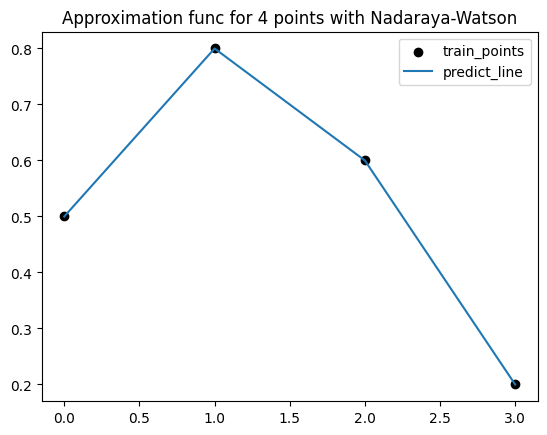

In [57]:
kernel = lambda r: abs(1 - r) * int(abs(r) <= 1)
metric = lambda x, xk: abs(x - xk)

def model(x):
    return sum([y * kernel(metric(x, xk) / h) for xk, y in zip(X,Y)]) / \
    sum([kernel(metric(x, xk) / h) for xk in X])
    
y_est = [model(x) for x in x_est]

plt.scatter(X, Y, c='black', label='train_points')
plt.plot(x_est, y_est, label='predict_line')
plt.title('Approximation func for 4 points with Nadaraya-Watson')
plt.legend()

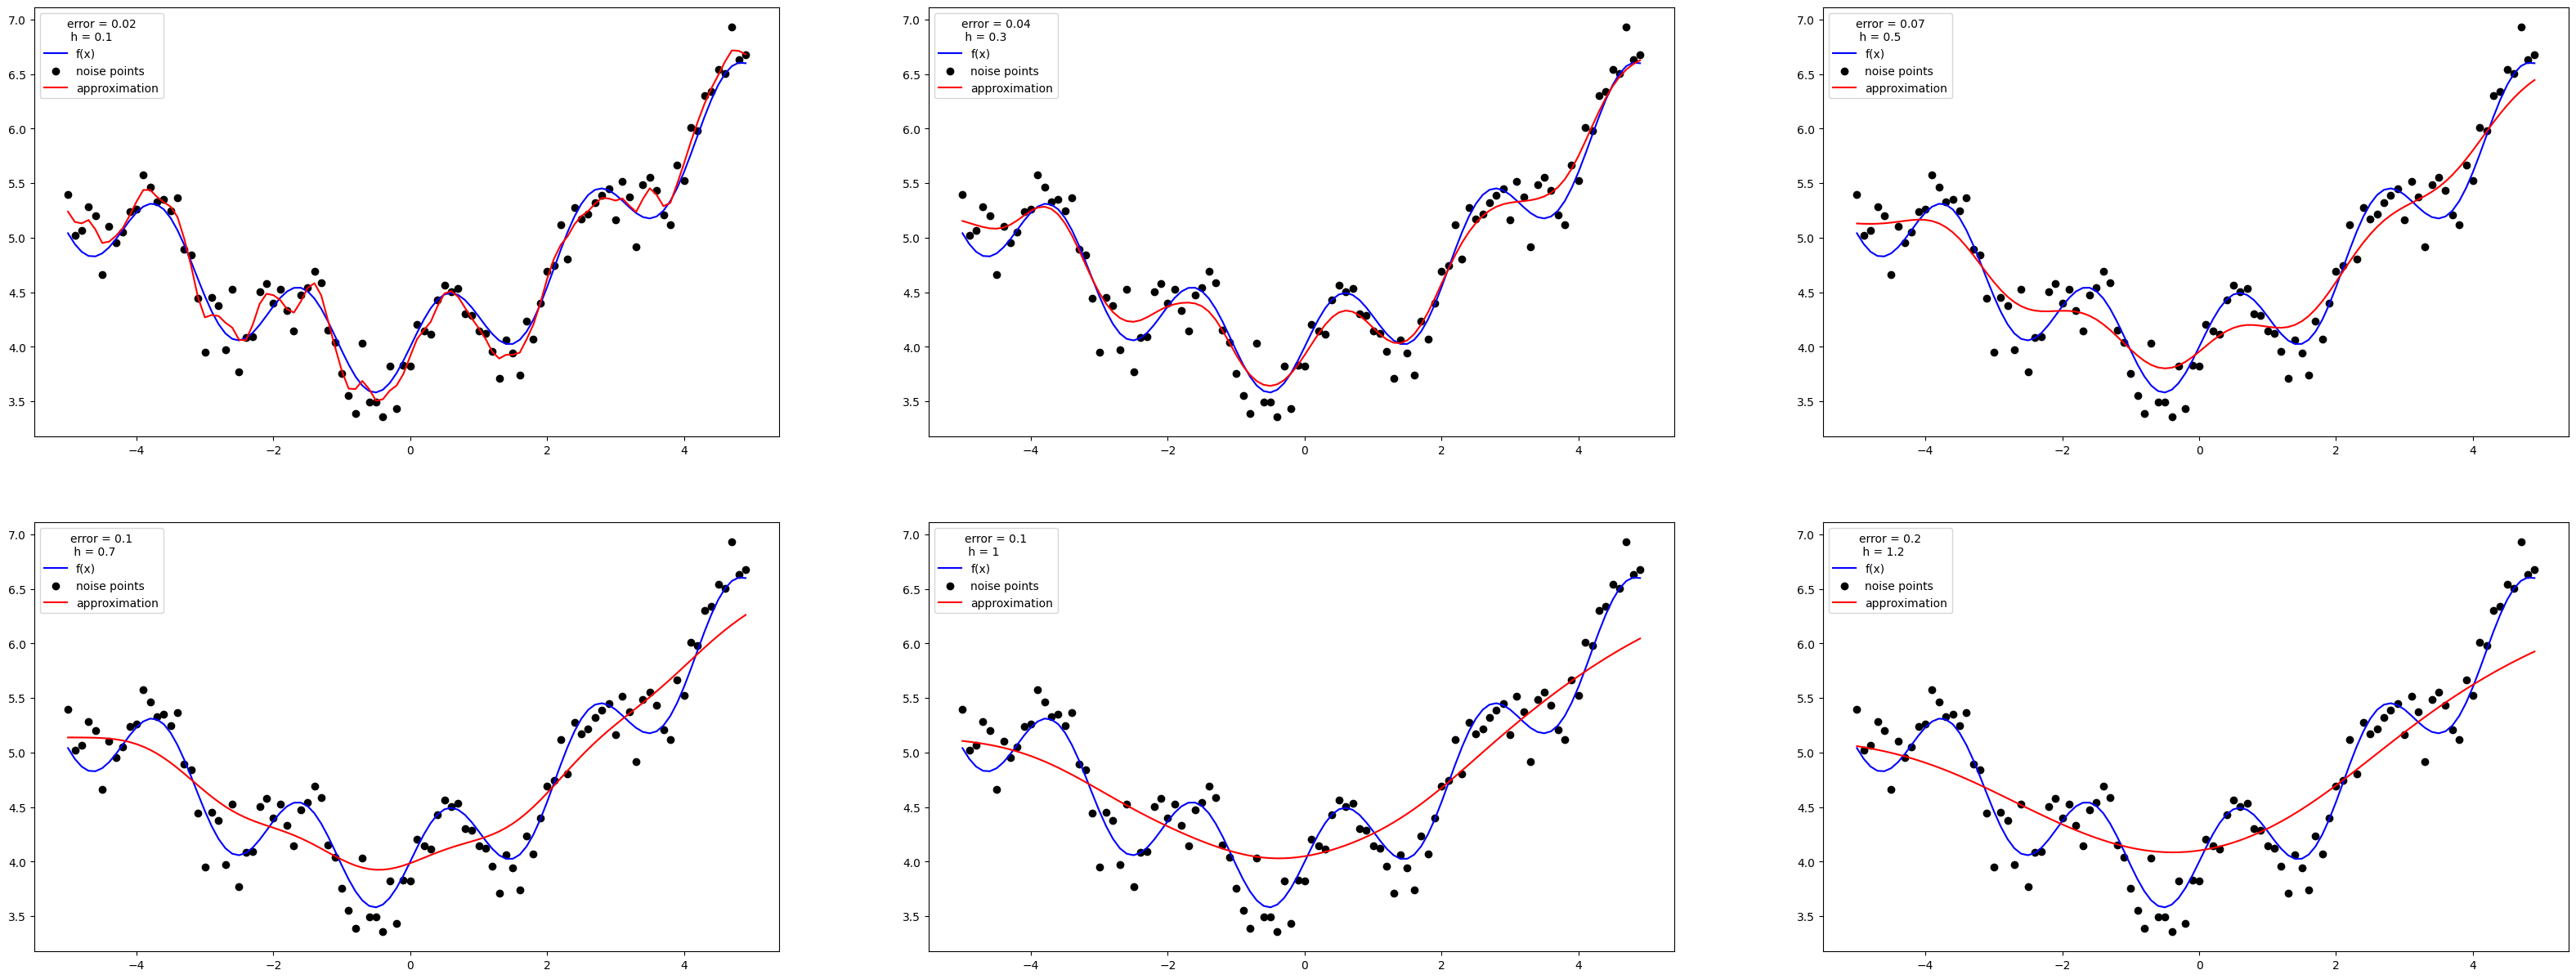

np.float64(0.15768049585743696)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 0.1 * x - np.cos(x/2) + 0.4 * np.sin(3*x) + 5


np.random.seed(0)

X = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
Y = func(X) + np.random.normal(0, 0.2, len(X)) # значения функции по оси ординат

kernel = lambda r: np.exp(-r * r / 2) / (2 * np.pi) ** 0.5
metric = lambda x, xk: abs(x - xk)

def model(x, h):
    return sum([y * kernel(metric(x, xk) / h) for xk, y in zip(X,Y)]) / \
    sum([kernel(metric(x, xk) / h) for xk in X])

h = [0.1, 0.3, 0.5, 0.7, 1, 1.2]
fig, axes = plt.subplots(2, 3, figsize=(40, 15))
for i, h_c in enumerate(h):
    y_est = model(X, h_c)
    Q = np.mean((y_est - Y)**2)
    axes[i // 3][i % 3 ].plot(X, func(X), c='b', label='f(x)')
    axes[i // 3][i % 3].scatter(X, Y, c='black', label='noise points')
    axes[i // 3][i % 3].plot(X, y_est, c='r', label='approximation')
    # axes[i].title('Approximation with Nadaraya_Watson')
    axes[i // 3][i % 3].legend(title=f'error = {Q:.1}\n h = {h_c}')
    
plt.show()

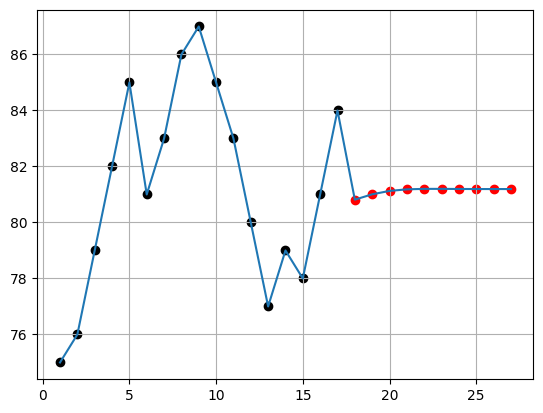

In [116]:
import numpy as np

# по имеющимся данным о курсах валют спрогнозировать курс на ближайшие 10 дней
rub_usd = np.array([75, 76, 79, 82, 85, 81, 83, 86, 87, 85, 83, 80, 77, 79, 78, 81, 84])
days = len(rub_usd) + 1
days_start = np.arange(1, days, 1)

kernel = lambda r: np.exp(-r * r / 2) / (2 * np.pi) ** 0.5
metric = lambda x, xk: abs(x - xk)

# h = 3
def model(x, X, Y, h=3):
    return sum([y * kernel(metric(x, xk) / h) for xk, y in zip(X,Y)]) / \
    sum([kernel(metric(x, xk) / h) for xk in X])

predict = []
days_pred = np.arange(days, days + 10, 1)
for i in days_pred:
    predict.append(model(i, days_start, rub_usd))
    days_start = np.append(days_start, i)
    rub_usd = np.append(rub_usd, predict[-1])

plt.plot(days_start, rub_usd)
plt.scatter(days_start[:17], rub_usd[:17], c='black')
plt.scatter(days_start[17:], rub_usd[17:], c='red')
plt.grid()